<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Quest_Simple_Image_Classification_with_Neural_Networks_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt

def history_plot_from_loss_acc(history, title):
  plt.figure(figsize=(10,5))

  train_loss_list = history.history['loss']
  train_accuracy = history.history['accuracy']
  val_loss_list = history.history['val_loss']
  val_accuracy_list = history.history['val_acc']
  x = history.epoch
  
  plt.subplot(1,2,1)
  plt.plot(x, train_loss_list)
  plt.plot(x, val_loss_list)
  plt.legend(['train_loss', 'val_loss'])
  plt.title(title+"_ LOSS")
  
  plt.subplot(1,2,2)
  plt.plot(x, train_accuracy)
  plt.plot(x, val_accuracy_list)
  plt.legend(['train_acc','val_accuracy'])
  plt.title(title+"_ ACCURACY")
  plt.show()

https://www.tensorflow.org/tutorials/keras/classification

#load the data

In [3]:
(X_train, y_train),(X_test, y_test) =  keras.datasets.fashion_mnist.load_data()

# view the data

In [4]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [5]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
np.unique(y_train[:])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### display Images

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_label = dict(zip(range(10), class_names))

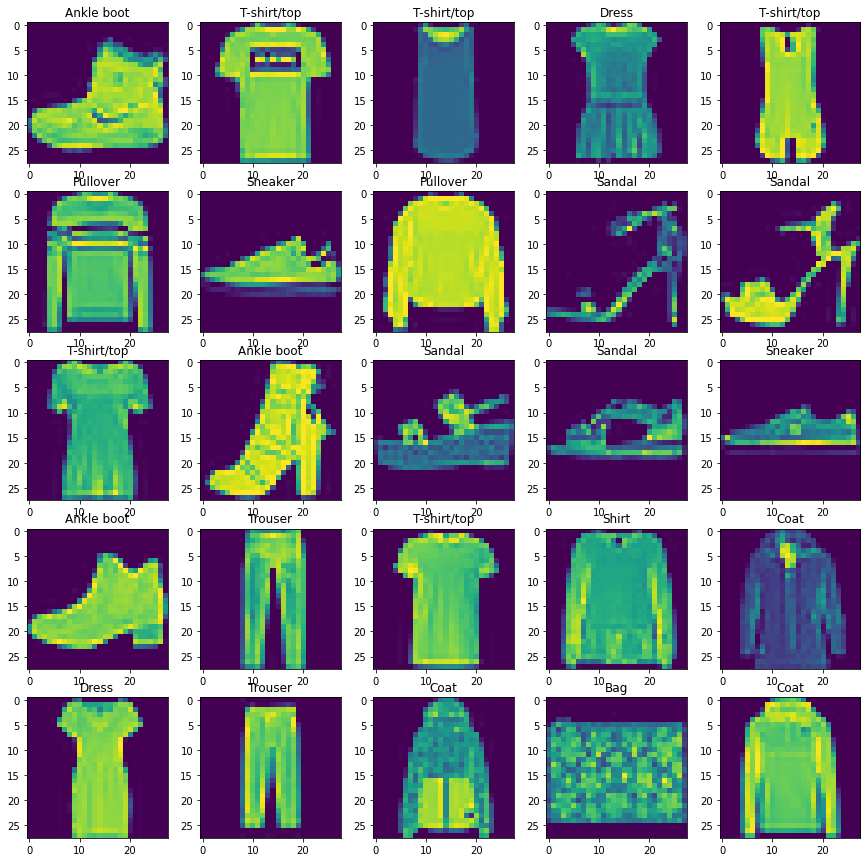

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(X_train[i])
  plt.title(class_label.get(y_train[i]))
  
plt.show()

# build model

## model without ImageDataGenerator

In [9]:
learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model = Sequential()
model.add(Conv2D(32, (3,3), padding='valid',activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [10]:
# reshape input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 49s 33ms/step - loss: 1.2019 - accuracy: 0.7455 - val_loss: 0.3780 - val_accuracy: 0.8609
Epoch 2/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3491 - accuracy: 0.8752 - val_loss: 0.3481 - val_accuracy: 0.8755
Epoch 3/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3115 - accuracy: 0.8875 - val_loss: 0.3300 - val_accuracy: 0.8812
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2864 - accuracy: 0.8940 - val_loss: 0.3100 - val_accuracy: 0.8886
Epoch 5/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2581 - accuracy: 0.9064 - val_loss: 0.3298 - val_accuracy: 0.8821
Epoch 6/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2405 - accuracy: 0.9109 - val_loss: 0.3025 - val_accuracy: 0.8876
Epoch 7/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2273 - accuracy: 0.9168 - val_loss: 0.3010 -

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
history_plot_from_loss_acc(history, "sparse_categorical_crossentropy")

## model_2 with ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.2)
datagen_test = ImageDataGenerator(rescale=1./255. )

train_generator = datagen.flow(X_train,y_train,batch_size=32,shuffle=True,seed=42,subset='training')# TODO,color_mode='grayscale'
valid_generator = datagen.flow(X_train,y_train,batch_size=32,shuffle=True,seed=42,subset='validation')
test_generator = datagen_test.flow(X_test,y_test,batch_size=32,seed=42)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST

In [ ]:
learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), padding='valid',activation='relu', input_shape=(28,28,1)))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(128,(3,3), padding='valid',activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(10,activation='softmax'))
model_2.summary()

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps = STEP_SIZE_TEST,
                    epochs=10)
                    

In [ ]:
model_2.evaluate(test_generator)

In [ ]:
history_plot_from_loss_acc(history_2, "ImageDataGenerator")

# model_3 add BatchNormalization 

In [ ]:
learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), padding='valid', input_shape=(28,28,1)))
model_3.add(BatchNormalization())
model_3.add(ReLU())
model_3.add(MaxPooling2D())

model_3.add(Conv2D(64,(3,3), padding='valid'))
model_3.add(BatchNormalization())
model_3.add(ReLU())
model_3.add(MaxPooling2D())


model_3.add(Conv2D(128,(3,3), padding='valid'))
model_3.add(BatchNormalization())
model_3.add(ReLU())
model_3.add(Flatten())

model_3.add(Dense(64))
model_3.add(BatchNormalization())
model_3.add(ReLU())

model_3.add(Dense(10,activation='softmax'))
model_3.summary()

In [ ]:
model_3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(X_train, y_train, epochs=15, validation_split=0.2)

In [ ]:
model_3.evaluate(X_test, y_test)

In [ ]:
history_plot_from_loss_acc(history_3, "model_3 BatchNormalization")

# model_4 with dropout and Batchnormalization

In [ ]:
drop_1 = 0.3 # Dropout rate  
drop_2 = 0.5 # Dropout rate for 1st Dense layer

learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_4 = Sequential()
model_4.add(Conv2D(32, (3,3), padding='valid', input_shape=(28,28,1)))
model_4.add(BatchNormalization())
model_4.add(ReLU())
model_4.add(MaxPooling2D())
model_4.add(Dropout(drop_1))

model_4.add(Conv2D(64,(3,3), padding='valid'))
model_4.add(BatchNormalization())
model_4.add(ReLU())
model_4.add(MaxPooling2D())
model_4.add(Dropout(drop_1))

model_4.add(Conv2D(128,(3,3), padding='valid'))
model_4.add(BatchNormalization())
model_4.add(ReLU())
model_4.add(Flatten())
model_4.add(Dropout(drop_2))

model_4.add(Dense(64))
model_4.add(BatchNormalization())
model_4.add(ReLU())

model_4.add(Dense(10,activation='softmax'))
model_4.summary()

In [ ]:
model_4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(X_train, y_train, epochs=15, validation_split=0.2)

In [ ]:
model_4.evaluate(X_test, y_test)

In [ ]:
history_plot_from_loss_acc(history_4, "model_4 BatchNormalization and dropout")